In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import cv2
import glob

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
path_No = 'D:/brain_tumor_dataset/Data/no/*'
path_Yes = 'D:/brain_tumor_dataset/Data/yes/*'

In [4]:
tumor = []
no_tumor = []

In [5]:
# sets a seed for random number generation, ensuring some reproducibility in the data preprocessing steps (useful for splitting data later).
random_state = 42

for file in glob.iglob(path_Yes):
    img = cv2.imread(file)      
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        
    img = cv2.resize(img, (224, 224)) 
    tumor.append((img, 1)) 

In [6]:
for file in glob.iglob(path_No):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    no_tumor.append((img, 0)) 

In [7]:
print(len(no_tumor))

98


In [8]:
all_data = tumor + no_tumor
print(len(all_data))

253


In [9]:
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

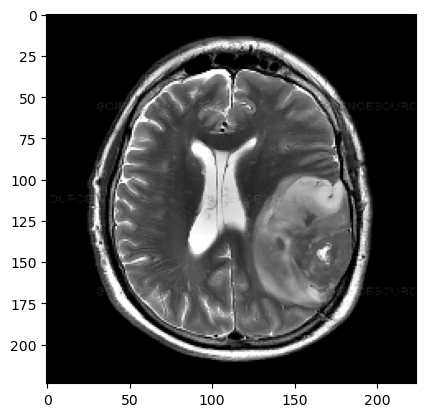

In [10]:
# displays a single image from the data 
plt.imshow(data[10])

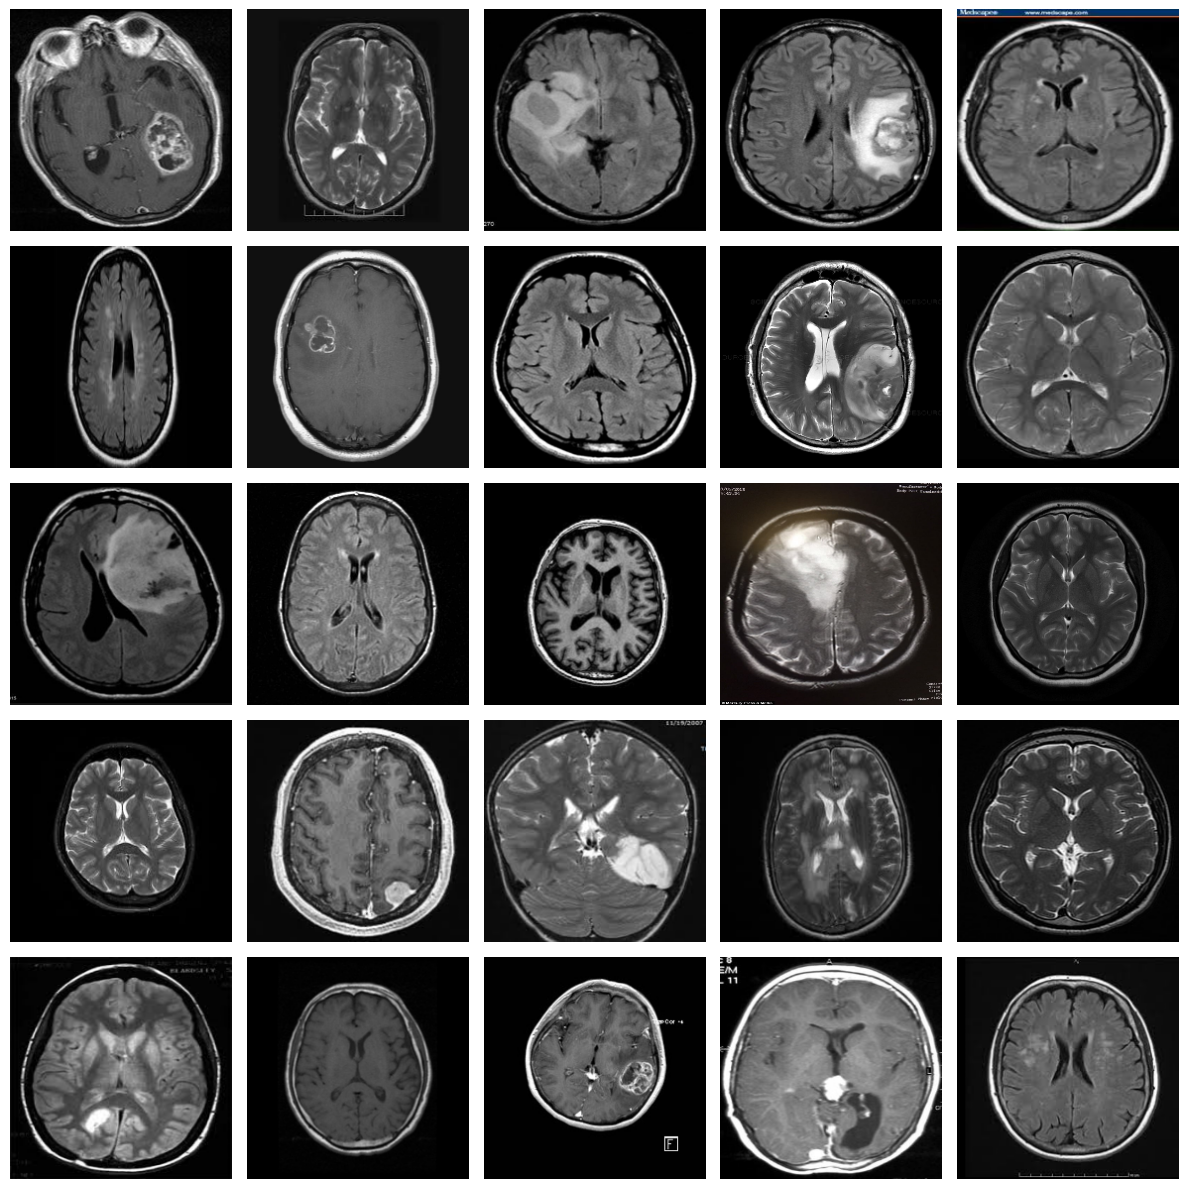

In [11]:
# Visualizing a Grid of Random Images
import matplotlib.pyplot as plt
import numpy as np

# Define number of rows and columns for the grid
num_rows = 5
num_cols = 5

# Randomly select indices for images
image_indices = np.random.randint(0, len(data), size=num_rows * num_cols)

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot random images
for i in range(num_rows):
  for j in range(num_cols):
    index = image_indices[i * num_cols + j]
    axes[i, j].imshow(data[index])
    axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

In [13]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

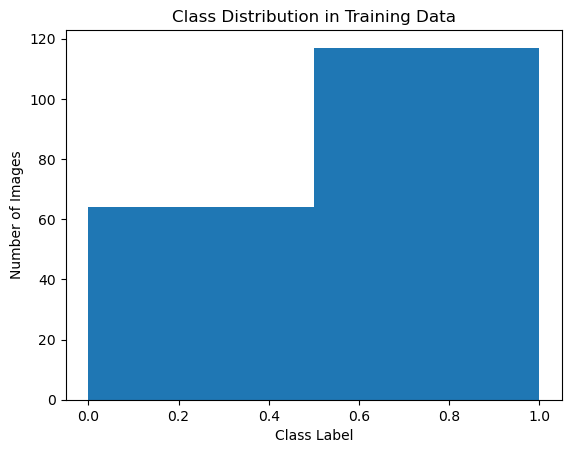

In [14]:
plt.hist(y_train, bins=2)  # Bins for tumor (1) and no tumor (0)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.show()

In [15]:
from tensorflow import keras

model = keras.Sequential([
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


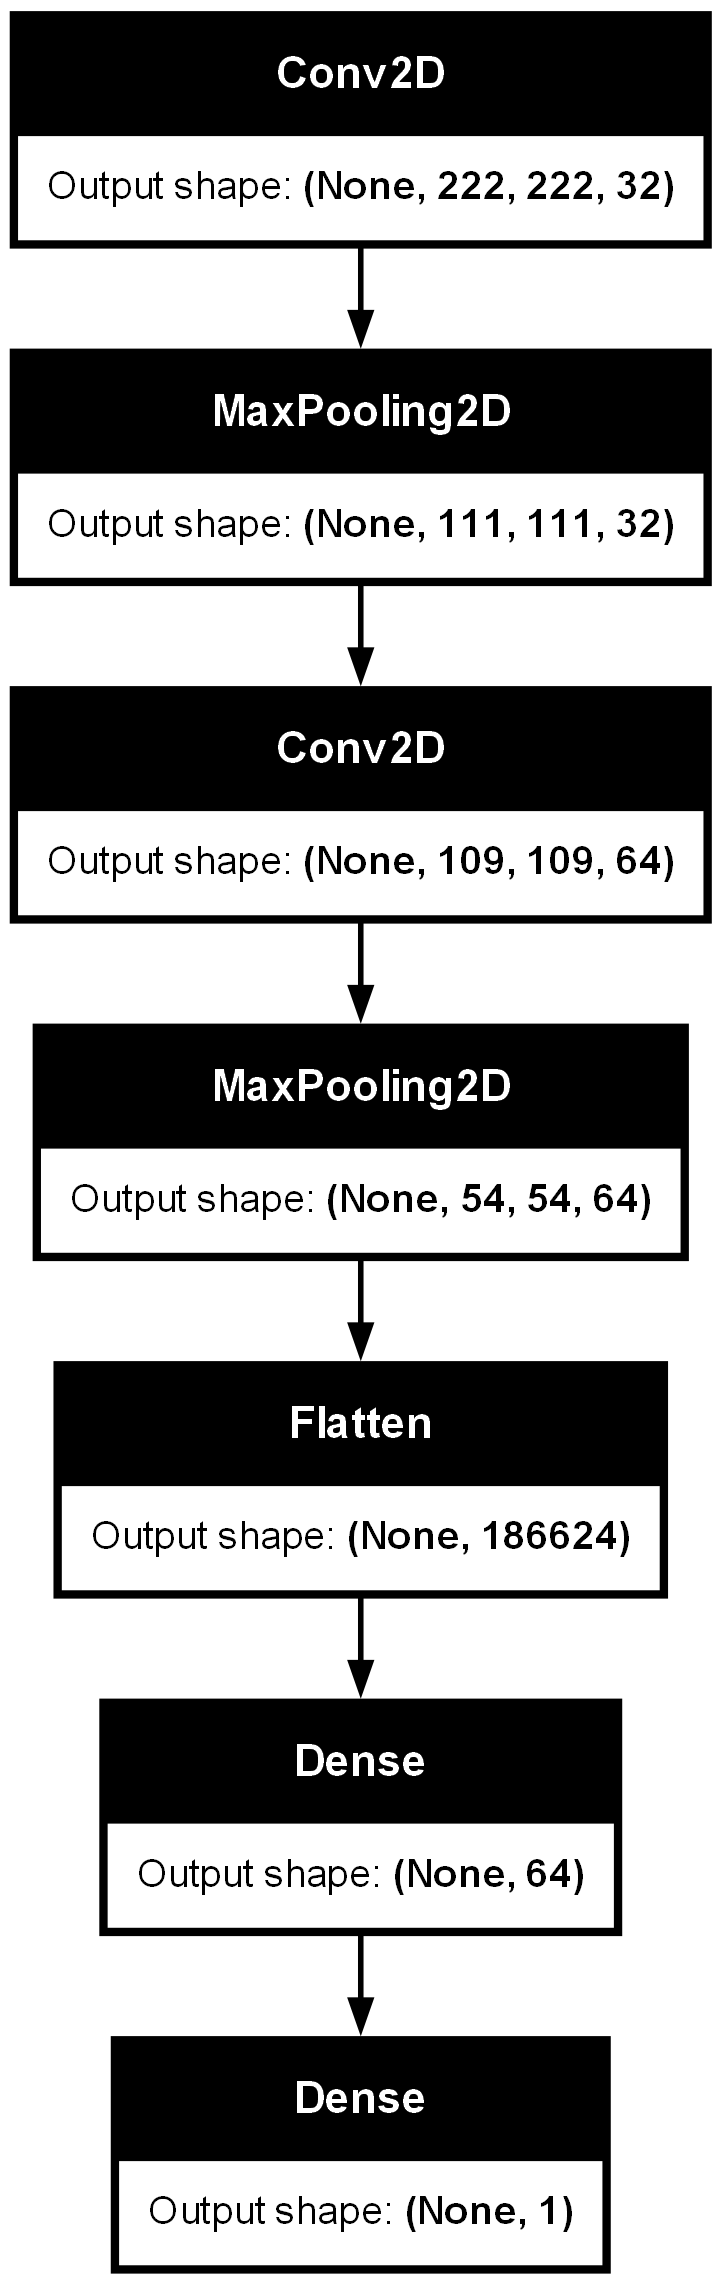

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.4230 - loss: 0.7019
Test Loss: 0.7010960578918457
Test Accuracy: 0.4313725531101227


In [19]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define input shape (assuming your images are 224x224 with 3 channels)
input_shape = (224, 224, 3)

# Define the model layers
inputs = Input(shape=input_shape)  # Input layer

# Feature extraction layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)  # Convolutional layer 1
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 1
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)  # Convolutional layer 2
x = MaxPooling2D(pool_size=(2, 2))(x)  # Max pooling layer 2

# Flatten the feature maps
x = Flatten()(x)

# Classification layers
x = Dense(units=128, activation='relu')(x)  # Fully connected layer 1
outputs = Dense(units=1, activation='sigmoid')(x)  # Output layer with sigmoid for binary classification

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model (replace with your training data)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5290 - loss: 2.3260 - val_accuracy: 0.5686 - val_loss: 1.2084
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7779 - loss: 0.5912 - val_accuracy: 0.6667 - val_loss: 0.6111
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8610 - loss: 0.3852 - val_accuracy: 0.7255 - val_loss: 0.5581
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8956 - loss: 0.2429 - val_accuracy: 0.7255 - val_loss: 0.5327
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9511 - loss: 0.1300 - val_accuracy: 0.7255 - val_loss: 0.5831
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9904 - loss: 0.0585 - val_accuracy: 0.7451 - val_loss: 0.5365
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.7255 - val_loss: 0.6870
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.7451 - val_loss: 0.7983
Epoch 9/

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.7259 - loss: 0.9792
Test Loss: 0.8520772457122803
Test Accuracy: 0.7450980544090271


In [21]:
# Train your model (replace with your training data and model)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Extract training and validation loss/accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss/accuracy
epochs = range(len(train_loss))  # Get number of epochs
plt.figure(figsize=(10, 6))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.7451 - val_loss: 1.0418
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 6.1836e-04 - val_accuracy: 0.7451 - val_loss: 1.2165
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 3.0834e-04 - val_accuracy: 0.7255 - val_loss: 1.2303
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 2.8611e-04 - val_accuracy: 0.7255 - val_loss: 1.1456
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 1.0000 - loss: 2.1217e-04 - val_accuracy: 0.7451 - val_loss: 1.1807
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 1.7343e-04 - val_accuracy: 0.7451 - val_loss: 1.2223
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 1.0000 - loss: 1.4540e-04 - val_accuracy: 0.7451 - val_loss: 1.2363
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 1.0000 - loss: 1.0501e-04 - val_accuracy: 0.7451

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

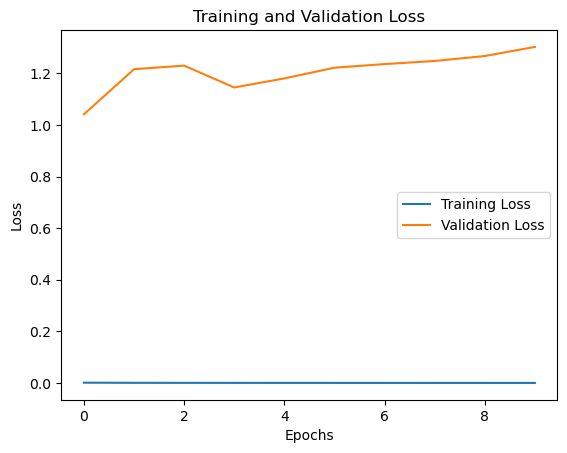

<Figure size 1000x600 with 0 Axes>

In [22]:
# Plot loss
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(10, 6))

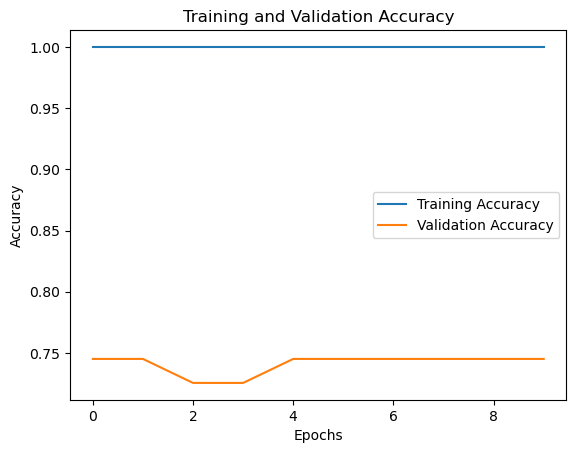

In [23]:
# Plot accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()